# Handling Missing Values Using Imputation
(Mean/Median or Mode)

> For categorical we will use mode 
, For numerical we will use mean

In [63]:
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine']

#this is categorical data so we will use mode concept here.

for i in cols:
    df_loan[i].fillna(df_loan[i].mode()[0], inplace=True)
    print(i)

ClosedDate
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
FirstRecordedCreditLine


In [64]:
cols =['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper','ProsperScore','EmploymentStatusDuration','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries',
      'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades',
      'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','DebtToIncomeRatio','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']
#this is numerical data so we will use mean concept here.

for i in cols:
    df_loan[i].fillna(df_loan[i].mean(), inplace=True)
    print(i)


BorrowerAPR
CreditScoreRangeLower
CreditScoreRangeUpper
ProsperScore
EmploymentStatusDuration
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
ScorexChangeAtTimeOfListing
LoanFirstDefaultedCycleNumber


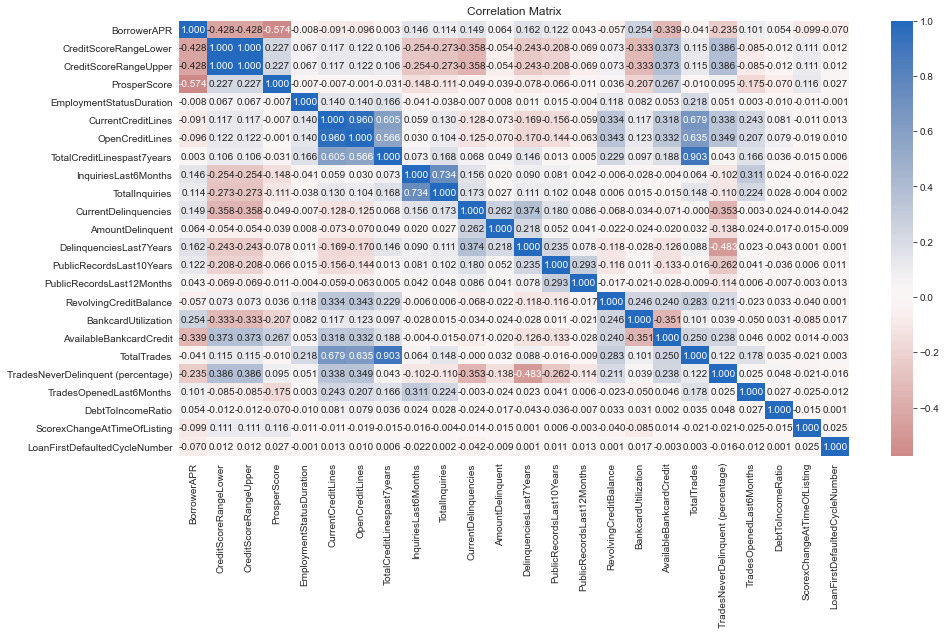

In [65]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [15, 8])
sns.heatmap(df_loan[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

# Data Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'IsBorrowerHomeowner','CurrentlyInGroup','DateCreditPulled','IncomeRange','IncomeVerifiable','LoanKey','LoanOriginationQuarter',
       'MemberKey']
df_loan[cols] = df_loan[cols].apply(LabelEncoder().fit_transform)
df_loan.head()

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,Completed,1136,0.16516,0.1580,0.1380,3,5.950067,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,Current,2795,0.12016,0.0920,0.0820,0,7.000000,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,Completed,1261,0.28269,0.2750,0.2400,3,5.950067,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,Current,2795,0.12528,0.0974,0.0874,0,9.000000,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,Current,2795,0.24614,0.2085,0.1985,4,4.000000,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [67]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 65 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingNumber                       113937 non-null  int64  
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   ClosedDate                          113937 non-null  int32  
 4   BorrowerAPR                         113937 non-null  float64
 5   BorrowerRate                        113937 non-null  float64
 6   LenderYield                         113937 non-null  float64
 7   ProsperRating (Alpha)               113937 non-null  int32  
 8   ProsperScore                        113937 non-null  float64
 9   ListingCategory (numeric)           113937 non-null  int64  
 10  BorrowerState                       113937 non-null  int32  
 11  Occupation                

In [68]:

X = df_loan.drop(columns='LoanStatus', axis=1)
Y = df_loan['LoanStatus']
X

,ListingNumber,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,1136,0.16516,0.1580,0.1380,3,5.950067,0,5,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,2795,0.12016,0.0920,0.0820,0,7.000000,2,5,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,1261,0.28269,0.2750,0.2400,3,5.950067,0,10,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,2795,0.12528,0.0974,0.0874,0,9.000000,16,10,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,2795,0.24614,0.2085,0.1985,4,4.000000,2,23,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,2795,0.22354,0.1864,0.1764,3,5.000000,1,14,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,2795,0.13220,0.1110,0.1010,0,8.000000,7,38,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,2795,0.23984,0.2150,0.2050,4,3.000000,1,43,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,2592,0.28408,0.2605,0.2505,3,5.000000,2,10,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [69]:
df_loan['LoanStatus']

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [70]:
df_loan1 = pd.get_dummies(df_loan['LoanStatus'])
print(df_loan1.head())


   Cancelled  Chargedoff  Completed  Current  Defaulted  \
0          0           0          1        0          0   
1          0           0          0        1          0   
2          0           0          1        0          0   
3          0           0          0        1          0   
4          0           0          0        1          0   

   FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                       0                     0                      0   
1                       0                     0                      0   
2                       0                     0                      0   
3                       0                     0                      0   
4                       0                     0                      0   

   Past Due (31-60 days)  Past Due (61-90 days)  Past Due (91-120 days)  \
0                      0                      0                       0   
1                      0                      0   

In [71]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [72]:
df['LoanStatus'].isnull().sum()

0

In [73]:
df_loan2 = pd.concat((df_loan1, df_loan), axis=1)
df_loan2 = df_loan2.drop(["LoanStatus"], axis=1)
df_loan2 = df_loan2.drop(["Cancelled","Chargedoff","Current","Defaulted","FinalPaymentInProgress","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                              "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"], axis=1)
data= df_loan2.rename(columns={"Completed": "LoanStatus"})
print(data)

        LoanStatus  ListingNumber  Term  ClosedDate  BorrowerAPR  \
0                1         193129    36        1136      0.16516   
1                0        1209647    36        2795      0.12016   
2                1          81716    36        1261      0.28269   
3                0         658116    36        2795      0.12528   
4                0         909464    36        2795      0.24614   
...            ...            ...   ...         ...          ...   
113932           0         753087    36        2795      0.22354   
113933           0         537216    36        2795      0.13220   
113934           0        1069178    60        2795      0.23984   
113935           1         539056    60        2592      0.28408   
113936           0        1140093    36        2795      0.13189   

        BorrowerRate  LenderYield  ProsperRating (Alpha)  ProsperScore  \
0             0.1580       0.1380                      3      5.950067   
1             0.0920       0.0820  

In [91]:
X = data.drop(columns='LoanStatus', axis=1)
Y = data['LoanStatus']
X

,ListingNumber,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,1136,0.16516,0.1580,0.1380,3,5.950067,0,5,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,2795,0.12016,0.0920,0.0820,0,7.000000,2,5,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,1261,0.28269,0.2750,0.2400,3,5.950067,0,10,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,2795,0.12528,0.0974,0.0874,0,9.000000,16,10,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,2795,0.24614,0.2085,0.1985,4,4.000000,2,23,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,2795,0.22354,0.1864,0.1764,3,5.000000,1,14,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,2795,0.13220,0.1110,0.1010,0,8.000000,7,38,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,2795,0.23984,0.2150,0.2050,4,3.000000,1,43,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,2592,0.28408,0.2605,0.2505,3,5.000000,2,10,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [94]:
Y

0         1
1         0
2         1
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    1
113936    0
Name: LoanStatus, Length: 113937, dtype: uint8

In [77]:
#train and test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)
print(X.shape, X_train.shape, X_test.shape)

(113937, 64) (91149, 64) (22788, 64)


# Mutual Information Score

In [84]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.20243153, 0.05651967, 0.3846982 , 0.20977412, 0.16982938,
       0.16390034, 0.02529471, 0.08330481, 0.05277246, 0.00997459,
       0.00775275, 0.09436236, 0.01675186, 0.00284155, 0.01252869,
       0.20226952, 0.022609  , 0.02491768, 0.0128254 , 0.01560773,
       0.01915443, 0.00751908, 0.00631685, 0.01722789, 0.0064501 ,
       0.00655861, 0.00230267, 0.01090914, 0.00245895, 0.0041663 ,
       0.01229336, 0.01781086, 0.01743257, 0.01343773, 0.01476218,
       0.01497503, 0.01188185, 0.01194813, 0.01681154, 0.01139871,
       0.00708679, 0.00251467, 0.01048754, 0.07697743, 0.07681263,
       0.19956201, 0.2015877 , 0.06292377, 0.20151633, 0.01884202,
       0.14041911, 0.2384099 , 0.55851124, 0.07678148, 0.0760536 ,
       0.00947312, 0.06824714, 0.06525111, 0.01233559, 0.00925034,
       0.00910938, 0.00281324, 0.00764401, 0.07782868])

In [80]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

LP_CustomerPrincipalPayments    0.558535
ClosedDate                      0.383527
LP_CustomerPayments             0.238536
BorrowerAPR                     0.208362
ListingNumber                   0.202476
                                  ...   
IsBorrowerHomeowner             0.004744
PublicRecordsLast10Years        0.003534
LoanKey                         0.002772
CurrentDelinquencies            0.000000
DelinquenciesLast7Years         0.000000
Length: 64, dtype: float64

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)
